## Assignment



To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Get the silhoutte coefficient of the two cluster k-means solution. You'll notice that the silhoutte coefficient will turn out to be greater than the one above where cluster number is three. We know that the Iris dataset consists of three different clusters. How do you explain that **the silhoutte score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes**?



### Answer 1: 
In Iris dataset, one of the clusters is perfectly differentiable from the other two clusters but the remaining two clusters are mixed slightly. When we set k=3, algorithm will find 3 clusters as in the real case. With k=3 setting, b scores will be small for the datapoints of these two clusters since b score evaluates the distance between a datapoint in one cluster and other datapoints in the nearest cluster. Therefore Silhouette Coefficient will be smaller than k=2 case. 

2. In this assignment, you work with the [heart disease data](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)  which you worked in the assignment of the previous checkpoint. 

    i. Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one?  
    ii. Get ARI scores for each of the previous solutions. Which model is the best?  
    iii. Get silhoutte coefficients for each of the previous solutions. Which model is the best?  

### Answer 2: 

In [29]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA



In [143]:
df = pd.read_csv('heart_disease.csv')


In [144]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [145]:
#dealing with categorical data. One hot encoding 

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['sex'], prefix = "sex")
e = pd.get_dummies(df['restecg'], prefix = "restecg")
f = pd.get_dummies(df['exang'], prefix = "exang")
g = pd.get_dummies(df['fbs'], prefix = "fbs")

frames = [df, a, b, c, d, e, f, g]
df = pd.concat(frames, axis = 1)

df.drop(columns = ['cp', 'thal', 'slope', 'sex', 'restecg', 'exang', 'fbs'], inplace=True)

In [147]:
data= df.drop(columns='num')
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_3.0,sex_0.0,sex_1.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0
0,63.0,145.0,233.0,150.0,2.3,0.0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
1,37.0,130.0,250.0,187.0,3.5,0.0,0,0,1,0,...,1,0,1,1,0,0,1,0,1,0
2,41.0,130.0,204.0,172.0,1.4,0.0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
3,56.0,120.0,236.0,178.0,0.8,0.0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
4,57.0,120.0,354.0,163.0,0.6,0.0,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0


In [148]:
X=data.drop(index=0)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=123)

In [149]:
pca.explained_variance_ratio_

array([0.15661668, 0.11297346])

In [150]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=333).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

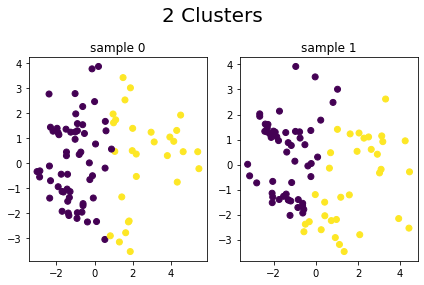

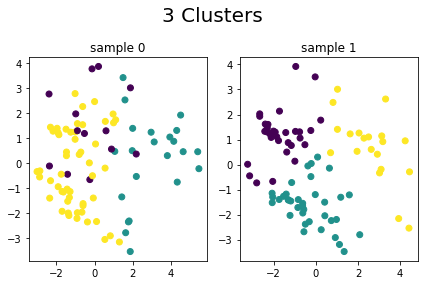

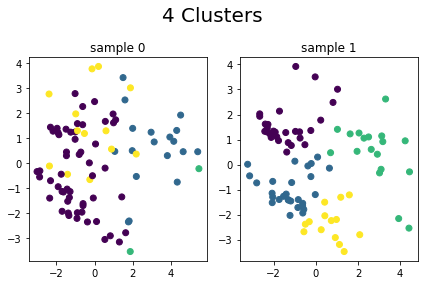

In [154]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

##### k=2 is the best since two different samples have similar clusters.

### Adjusted Rand Index

In [155]:
from sklearn import metrics
X=df.drop(columns='num')
y=df.num

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

full_pred2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
full_pred3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
full_pred4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

In [156]:
metrics.adjusted_rand_score(y, full_pred2)

0.21460419289336144

In [157]:
metrics.adjusted_rand_score(y, full_pred3)

0.08093855277602775

In [158]:
metrics.adjusted_rand_score(y, full_pred4)

0.04989995436514902

##### k=2 is best with the highest ARI score.

### Silhouette Coefficient

In [159]:
model2 = KMeans(n_clusters=2, random_state=123).fit(X_std)
labels2 = model2.labels_
print(metrics.silhouette_score(X_std, labels2, metric='euclidean'))

0.18017176325246625


In [160]:
model3 = KMeans(n_clusters=3, random_state=123).fit(X_std)
labels3 = model3.labels_
print(metrics.silhouette_score(X_std, labels3, metric='euclidean'))

0.16367953152799342


In [164]:
model4 = KMeans(n_clusters=4, random_state=123).fit(X_std)
labels4 = model4.labels_
print(metrics.silhouette_score(X_std, labels4, metric='euclidean'))

0.11155516356683151


k=2 is the best with the highest silhouette coefficient value. 

## A different visualization for Silhouette Coefficient

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.1658942440440222
For n_clusters = 3 The average silhouette_score is : 0.16367953152799342
For n_clusters = 4 The average silhouette_score is : 0.11180909187912154
For n_clusters = 5 The average silhouette_score is : 0.12536157345731486
For n_clusters = 6 The average silhouette_score is : 0.12455005333779968


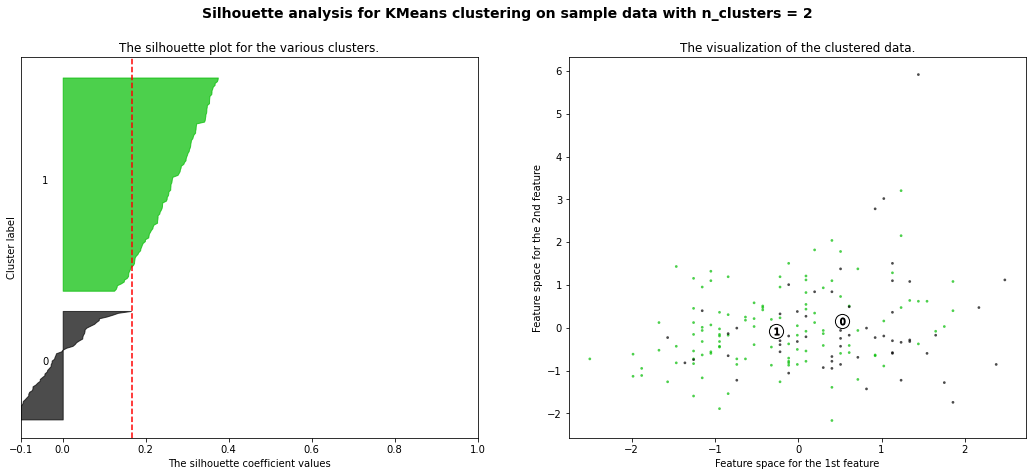

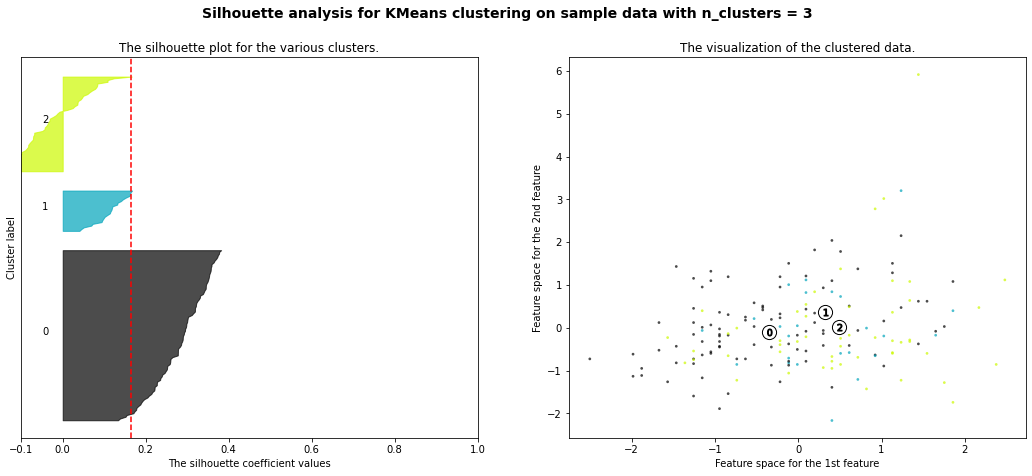

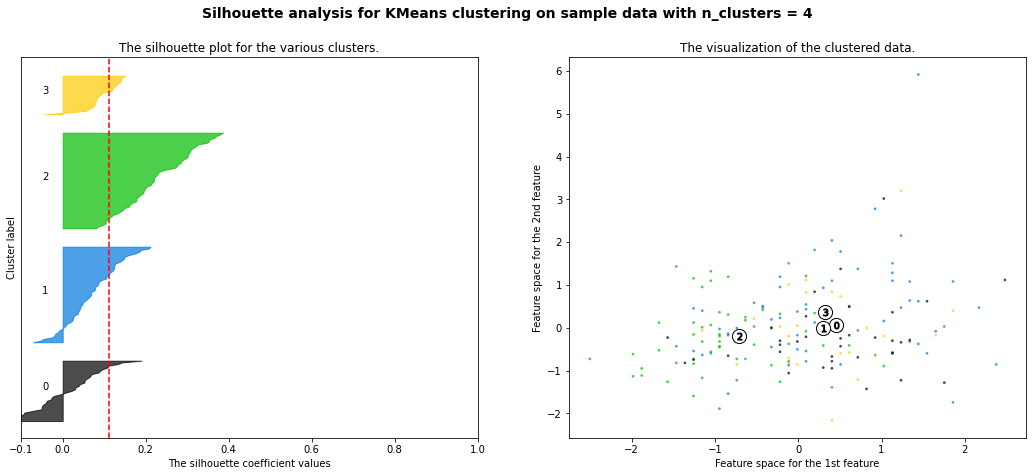

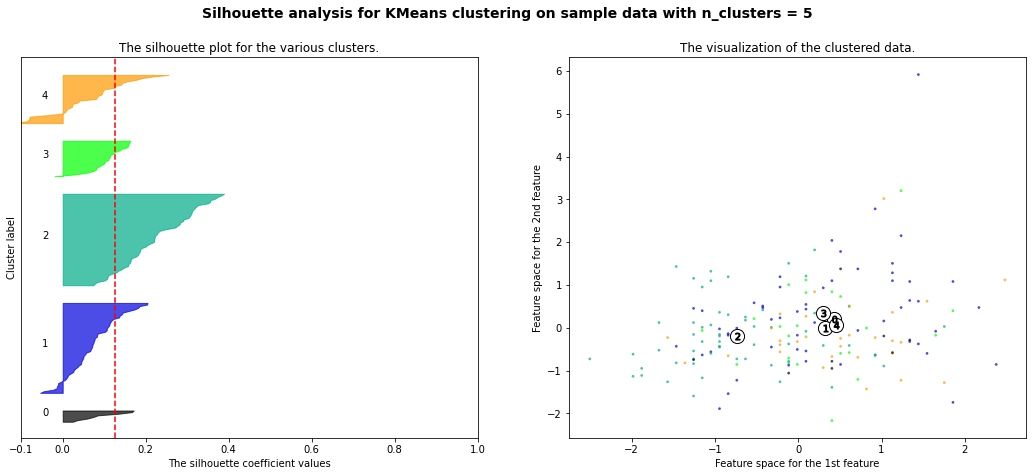

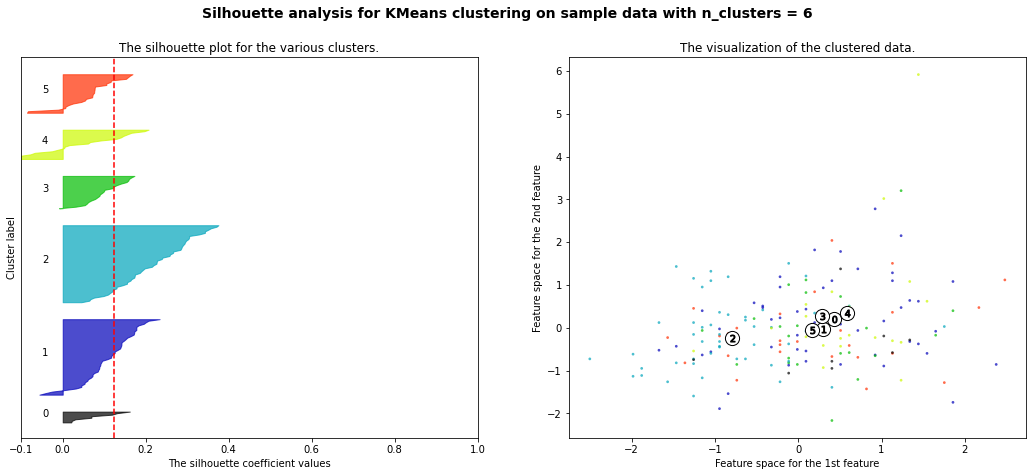

In [163]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_std

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()